In [1]:
# Загрузка датасета с Кеггла
!pip install kaggle -q
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!pip install --upgrade --force-reinstall --no-deps kaggle==1.5.12 -q
!kaggle --version

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.0/59.0 kB 984.6 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
Kaggle API 1.5.12


# Загрузка данных

In [2]:
!kaggle datasets download -d thedevastator/south-park-scripts-dataset
!unzip '/content/south-park-scripts-dataset.zip' -d'/content/data'

  0% 0.00/3.70M [00:00<?, ?B/s]
100% 3.70M/3.70M [00:00<00:00, 185MB/s]
Archive:  /content/south-park-scripts-dataset.zip
  inflating: /content/data/All-seasons.csv  
  inflating: /content/data/Season-1.csv  
  inflating: /content/data/Season-10.csv  
  inflating: /content/data/Season-11.csv  
  inflating: /content/data/Season-12.csv  
  inflating: /content/data/Season-13.csv  
  inflating: /content/data/Season-14.csv  
  inflating: /content/data/Season-15.csv  
  inflating: /content/data/Season-16.csv  
  inflating: /content/data/Season-17.csv  
  inflating: /content/data/Season-18.csv  
  inflating: /content/data/Season-19.csv  
  inflating: /content/data/Season-2.csv  
  inflating: /content/data/Season-3.csv  
  inflating: /content/data/Season-4.csv  
  inflating: /content/data/Season-5.csv  
  inflating: /content/data/Season-6.csv  
  inflating: /content/data/Season-7.csv  
  inflating: /content/data/Season-8.csv  
  inflating: /content/data/Season-9.csv  


In [3]:
import numpy as np
import pandas as pd

In [4]:
df_main = pd.read_csv('/content/data/All-seasons.csv')
df_main['Line'] = df_main['Line'].apply(lambda x: x.replace("\n",""))
df_main.sample(20)

,Season,Episode,Character,Line
18706,15,9,Worker 2,"¡Oye Yimenez! ¡Nos vamos a regresar, hombre!"
68855,9,6,Butters,Wuh I hate my stupid psychotic brain!
54387,5,14,Man 2 in Crowd,Yeah-ah-alright!
47223,4,9,Stan,"Dad, Cartman said we're gonna perform at the m..."
45141,4,3,Grandpa,"...remember any of that stuff, do ya?"
2126,10,9,Joe,"Oh... Oh, that's giving me a clue. Yeah, ye-ye..."
18908,15,10,Stan,What? How do you know?
32004,1,13,Jimbo,Garrison? That's impossible. He's gay.
59669,7,1,Chef,"Get in the car, children! Get in the car!"
60036,7,2,Hackman,I'm good. You?


<Axes: >

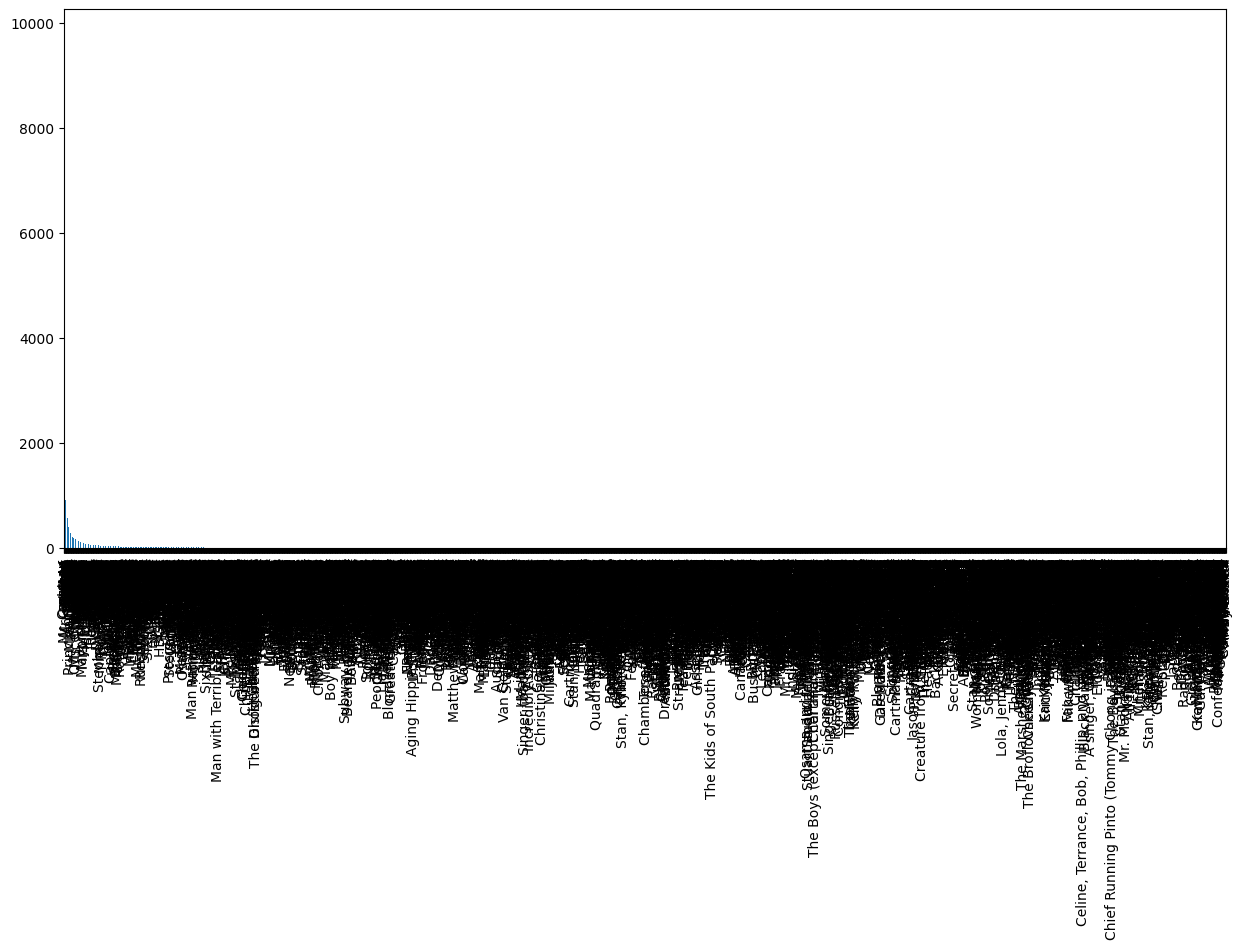

In [5]:
df_main.Character.value_counts().plot.bar(figsize=(15,7))

In [14]:
LEVEL_TALK = 1500
main_characters = df_main.Character.value_counts()[df_main.Character.value_counts()>LEVEL_TALK].index
main_characters

Index(['Cartman', 'Stan', 'Kyle', 'Butters', 'Randy'], dtype='object')

In [15]:
# filter rows based on list values
mask = df_main['Character'].isin(main_characters)
sep_df = df_main[mask]
sep_df.sample(10)

,Season,Episode,Character,Line
30705,1,9,Cartman,"How about we sing ""Kyle's Mom is a Stupid Bitc..."
68275,9,4,Kyle,Cartman!
69580,9,9,Butters,Now look! I'm getting pretty sick of this! Wel...
60693,7,4,Stan,What the hell are they doing now?
30904,1,10,Stan,"Jesus, Jesus!"
21284,16,7,Cartman,What?
3507,11,1,Stan,I just need to explain things. Hey Token. Loo...
69308,9,8,Stan,"Nothing. Can you just come get us, please?"
44928,4,2,Stan,CHEF!
34000,2,6,Cartman,"That's it! Now I'm all pissed off! Take that,..."


<Axes: >

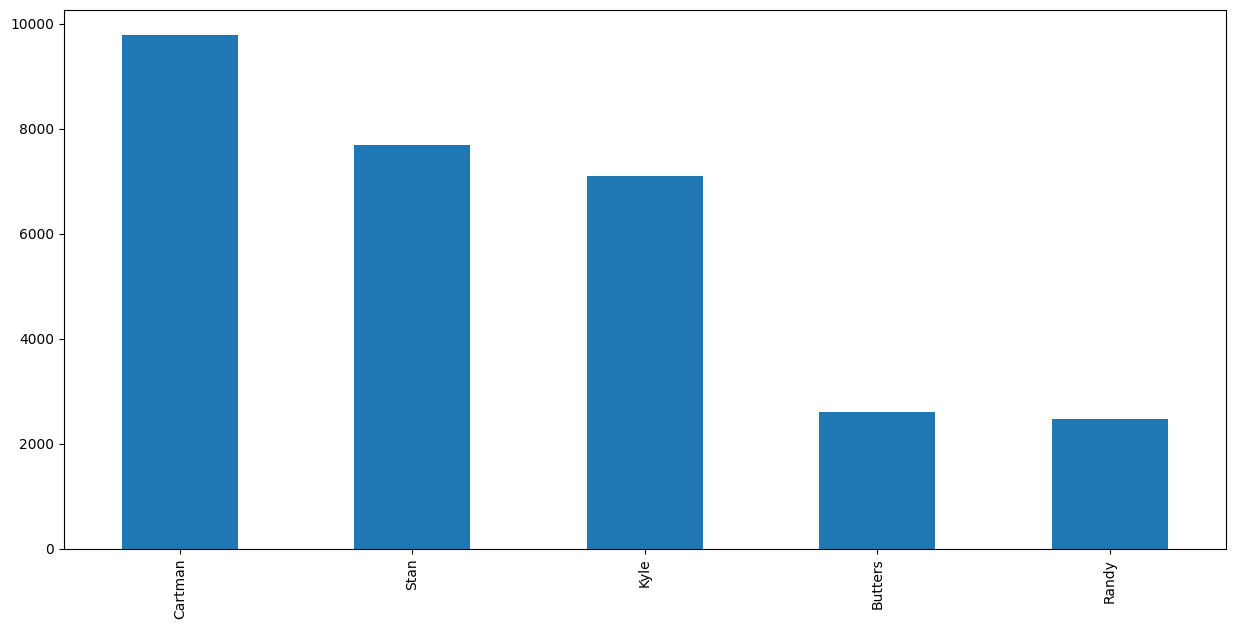

In [16]:
sep_df.Character.value_counts().plot.bar(figsize=(15,7))

Сделаем смещенную колонку от Charter  чтобы выявить и убрать строке с повторяющимся  Charter , оставивь последний

In [17]:
sep_df['repeat'] = sep_df['Character'].shift(-1)
sep_df

<ipython-input-17-b76c6030fd39>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sep_df['repeat'] = sep_df['Character'].shift(-1)


,Season,Episode,Character,Line,repeat
0,10,1,Stan,"You guys, you guys! Chef is going away.",Kyle
1,10,1,Kyle,Going away? For how long?,Stan
2,10,1,Stan,Forever.,Stan
4,10,1,Stan,"Chef said he's been bored, so he joining a gro...",Cartman
9,10,1,Cartman,I'm gonna miss him. I'm gonna miss Chef and I...,Stan
...,...,...,...,...,...
70891,9,14,Stan,I think you're pushing it.,Randy
70892,9,14,Randy,How about twenty?,Stan
70893,9,14,Stan,That's not disciprine.,Randy
70894,9,14,Randy,Right right. Does vodka count?,Stan


In [18]:
mask = sep_df['repeat'] == sep_df['Character']
sep_df = sep_df[~mask]
sep_df.reset_index(drop= True , inplace= True )
sep_df

,Season,Episode,Character,Line,repeat
0,10,1,Stan,"You guys, you guys! Chef is going away.",Kyle
1,10,1,Kyle,Going away? For how long?,Stan
2,10,1,Stan,"Chef said he's been bored, so he joining a gro...",Cartman
3,10,1,Cartman,I'm gonna miss him. I'm gonna miss Chef and I...,Stan
4,10,1,Stan,"Dude, how are we gonna go on? Chef was our fuh...",Randy
...,...,...,...,...,...
20112,9,14,Stan,I think you're pushing it.,Randy
20113,9,14,Randy,How about twenty?,Stan
20114,9,14,Stan,That's not disciprine.,Randy
20115,9,14,Randy,Right right. Does vodka count?,Stan


# from seminar

#TF-IDF векторизатор

In [19]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize, wordpunct_tokenize, sent_tokenize
nltk.download('stopwords')

from nltk.corpus import stopwords
eng_stopwords = stopwords.words("english")

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [20]:
tokenized_sentences = sep_df['Line'].apply(wordpunct_tokenize)
len(tokenized_sentences)

20117

## Initailize TfidfVectorizer

Инициализируйте TfidfVectorizer с ограничением размера словаря любым значением до 30000, игнорированием русских стоп-слов и использованием заданного токенизатора.

In [21]:
# vectorizer
vectorizer = TfidfVectorizer(stop_words=eng_stopwords,
                             ngram_range=(1,3),
                             max_features=5024,
                             tokenizer=wordpunct_tokenize)

In [22]:
matrix_tfidf = vectorizer.fit_transform(sep_df['Character'])
print(matrix_tfidf.shape)
print(type(matrix_tfidf))

(20117, 5)
<class 'scipy.sparse._csr.csr_matrix'>


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'"] not in stop_words.
  warnings.warn(


Берем с семинара класс для поиска лучших на TF-Idf, дополнив его посиском случайных из не вошедших лучших

In [23]:
class SimpleSearchEngine:
    def __init__(self, text_database: list[str], top_k: int):
        self.raw_procesed_data = [self.preprocess(sample) for sample in text_database]
        self.base = []
        self.retriever = None
        self.inverted_index = {}
        self._init_retriever(text_database)
        self._init_inverted_index(text_database)
        self.top_k = top_k

    @staticmethod
    def preprocess(sentence: str) -> str:
        return sentence

    def _init_retriever(self, text_database: list[str]):
        """
        TfidfVectorizer is used to convert a collection of raw documents into a
        matrix of TF-IDF features.
        Use fit_transform method of TfidfVectorizer to learn the vocabulary and
        idf from the training set and the transformed matrix.
        """
        self.retriever = TfidfVectorizer(stop_words=eng_stopwords,
                             ngram_range=(2,5),
                             max_features=5024,
                             tokenizer=wordpunct_tokenize)

        self.base = self.retriever.fit_transform(text_database) #train retriever

    def retrieve(self, query: str) -> np.array:
        return self.retriever.transform([query])

    def retrieve_documents(self, query: str, out = "best") -> np.array:
        """
        The query needs to be transformed into the same vector space as your
        document base.
        Utilize cosine_similarity to compute the similarity between the query
        vector and all document vectors in the base.
        Remember that cosine_similarity returns a matrix; you might need to
        flatten it to get a 1D array of similarity scores.
        Sort the documents based on their cosine similarity scores to find k
        most relevant ones to the query and return them as answer.
        """
        query_vector = self.retrieve(query)
        cosine_similarities = cosine_similarity(query_vector, self.base).flatten()
        if out == "best":
           relevant_indices = np.argsort(cosine_similarities, axis=0)[::-1][:self.top_k]
        elif out == "bad":
          relevant_indices = np.argsort(cosine_similarities, axis=0)[::-1][self.top_k:]
          relevant_indices = np.random.choice(relevant_indices, self.top_k, replace=False)
        return relevant_indices

    def _init_inverted_index(self, text_database: list[str]):
        self.inverted_index = dict(enumerate(text_database))

    def display_relevant_docs(self, query: str, full_database, out = "best") -> list[str]:
        docs_indexes = self.retrieve_documents(query, out = out)
        return [self.inverted_index[ind].replace('\n', "") for ind in docs_indexes]


In [24]:
simple_search_engine = SimpleSearchEngine(sep_df['Line'], 3)
query = "What is the best rest?"

best_results = simple_search_engine.display_relevant_docs(query, sep_df['Character'], 'best')
print(f'best_results {best_results}')

bad_results = simple_search_engine.display_relevant_docs(query, sep_df['Character'], 'bad')
print(f'bad_results {bad_results}')

best_results ['Dad!', "I'm dying of boredom.", "Hey Eric, I'm just lookin' at a video of bird eggs that I took."]
bad_results ['Oh what a perfect night for fighting. Lo, the moon sets upon the tips of the trees and I, the man known as the Rad Russian, start to stir with the excitement of violence.', 'Thirteen point seven inches?', 'Oh!! You guys, my ass, seriously..!']


In [25]:
test_text = 'What is the best rest?'
simple_search_engine = SimpleSearchEngine(sep_df['Line'], 5)
docs = simple_search_engine.retrieve_documents(test_text, 'best')
docs

array([20116,  6707,  6700,  6701,  6702])

# Make dataset

Теперь мы можем собрать новый датасет, собрав туда данные из датафрейма, дополнив их отборами через TF-idf

In [26]:
def window_back(id, win):
    if (id - win)<0:
      win = id
    return win

def window(id, win, top):
    if (id + win)> top:
      win = id
    return win

In [27]:
CON_WIND = 5 # context_window
CLOSE_REP = 4 # close_reply
TOP_K = 3 # top_k

DF_OUT = sep_df[['Season',	'Episode']]

# инициилизируем search_engine на TF-idf
simple_search_engine = SimpleSearchEngine(sep_df['Line'], TOP_K)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'"] not in stop_words.
  warnings.warn(


In [28]:
# speaker - тот кто говорит первый
DF_OUT['speaker'] = sep_df['Character'].shift(1)

# Что говорит speaker
DF_OUT['query'] = sep_df['Line'].shift(1)

# Собеседники
DF_OUT['companions'] = [sep_df.iloc[id+1:id+1 + window(id, CLOSE_REP, sep_df.shape[0])]['Character'].to_list() for id in sep_df.index]

# Ближайшие реплики собеседников
DF_OUT["close_reply"] = [sep_df.iloc[id+1:id+1 + window(id, CLOSE_REP, sep_df.shape[0])]['Line'].to_list() for id in sep_df.index]

# реплики подобранные на Tf-Idf
DF_OUT["neutral_reply"] = sep_df['Line'].apply(lambda query: simple_search_engine.display_relevant_docs(query, sep_df['Character'], 'best'))

# плохие реплики подобранные на Tf-Idf
DF_OUT["bad_reply"] = sep_df['Line'].apply(lambda query: simple_search_engine.display_relevant_docs(query, sep_df['Character'], 'bad'))

# контекст прошлых реплик разговора
DF_OUT["context"] = ['. '.join(sep_df.iloc[id-window_back(id, CON_WIND):id ]['Line'].to_list()) for id in sep_df.index]

DF_OUT.dropna(inplace=True)


<ipython-input-28-ff453443256e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_OUT['speaker'] = sep_df['Character'].shift(1)
<ipython-input-28-ff453443256e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_OUT['query'] = sep_df['Line'].shift(1)


In [29]:
DF_OUT.sample(10)

,Season,Episode,speaker,query,companions,close_reply,neutral_reply,bad_reply,context
17521,7,12,Stan,"They're not kooks, they're cool. I mean, how c...","[Stan, Randy, Stan, Randy]",[Mr. Harrison said that I should be followng H...,"[We have that, Stan. It's called Friday Night ...","[...No. Ey! Euuugh., Dude, looks like we're g...",That's not what the Harrisons said.. Who are t...
12688,4,10,Kyle,HAAAAH!,"[Stan, Cartman, Stan, Cartman]","[Cartman!, What?, Dude, you just said ""ass""! T...","[That would suck so much ass., If only we had ...","[Don't worry, Butters, I'm gonna get you out o...",I don't think so.. Stan! You've got to help us...
8089,1,7,Kyle,"...No, dude, that's Christmas.","[Kyle, Stan, Cartman, Kyle]","[Costumes and candy., Oh., Well, let's go home...","[Oh, then, what's Halloween about?, Oh, no, no...","[Mr. Mackey, you have to wake up now!, He's tr...","Yeah, he was too young to be taken from us.. D..."
4780,15,10,Kyle,Just tell us where Lemmiwinks is being held pr...,"[Butters, Stan, Kyle, Stan]","[There he is! It's Lemmiwinks! , Quick, we ne...","[Come on, you guys!, Come on, guys! , Come on,...",[So then don't have a slumber party if you're ...,What?. Lemmiwinks? Our old class gerbil?. What...
14486,5,13,Kyle,AAARGH!,"[Stan, Butters, Stan, Butters]","[Hey, I wasn't Kenny's worst f-f-f-friend! Ca...","[Aah! Kyle! Kyle! , Kyle! Kyle!, Nope! It has...","[Good job Ike! , Get really psyched up, Butter...","This whole time, you were just using Kenny's i..."
3674,14,3,Randy,"Oh, yeah. Testicular cancer. Here, here, you w...","[Randy, Cartman, Randy, Cartman]","[Alright, see you tomorrow! Oh God, I gotta h...",[Do I wanna do it? Does the Pope help pedophil...,[All I have to do is be thinking about America...,"Nooooooooo-! . Dad, Mom says to stop trying to..."
17256,7,10,Randy,Get up the stairs! Up the stairs! Come on! Com...,"[Randy, Cartman, Randy, Stan]","[In here! , They're not gonna stop until we're...","[Aah! There's another one!, That quest sucks, ...",[The whole town's pissed off at each other. I...,"Come on! . Oh God, they're coming! . Get over ..."
16592,7,3,Cartman,He almost spilled the beans in the counselor's...,"[Cartman, Kyle, Cartman, Kyle]","[I just wanted to see how you're doing, Kyle. ...","[What's this all about, Cartman?, What's this ...","[Dad? Is that you?, Fuck you, Eric. , How do y...",We have no choice. We have to kill Kyle.. ... ...
13213,4,17,Kyle,"Dreidel dreidel dreidel,I made you out of clay...","[Kyle, Cartman, Kyle, Stan]","[Don't you oppress me, fat boy., Don't call me...","[Heheheheh, Chanukah sucks., But Mr. Twig suck...","[that's why they're lame., If a Smurf dies and...","What?. Aren't you Jewish, Kyle?. Well, yes, I ..."
5139,16,4,Cartman,"Come on, Butters, you and me are gonna try to ...","[Cartman, Butters, Cartman, Butters]","[Look at these dense trees and brush. Oh yeah,...","[No, it's a school night!, He's cisginger! He'...",[Do you remember when I showed you the video o...,"If someone says they saw a Sasquatch, they are..."


## Save dataset

In [30]:
dir = "/content/drive/Othercomputers/My_comp/Документы/МФТИ_Наука_о_данных/NLP_generation/DZ/DZ_2/Project_gen_chatbot/data"
file_name = dir + "/talks_dataset.df"

DF_OUT.to_pickle(file_name)

In [31]:
load_df = pd.read_pickle(file_name)
load_df.sample(10)

,Season,Episode,speaker,query,companions,close_reply,neutral_reply,bad_reply,context
10888,3,5,Cartman,"You guys, listen to this song I just wrote. It...","[Stan, Cartman, Kyle, Cartman]","[Where are you going?, I'm going home for a mi...","[This is sweet, being rugged outdoorsmen. Fac...","[Holy geez wow! There's Ben Affleck, too!, Com...","Well, I mean, that's what was on the news.. Oh..."
17759,7,15,Kyle,I found the number for a really cheap airline ...,"[Cartman, Randy, Stan, Cartman]","[What?, Yeah. Who needs more stuff, anyway? Th...","[Dude, we just can't up and go to Canada. Look...",[It's not a fabulous app! It's fuckin' stupid!...,"Please, you guys, you don't understand. My fa..."
17767,7,15,Stan,"Whoa whoa, Cartman.","[Stan, Kyle, Stan, Cartman]","[Cartman, calm down!, Is that true?, It's true...",[It wasn't enough for you people to kill Jesus...,"[Y taco., Where's that?, Don't be silly, Stan....","Dad, don't get carried away.. You fucking assh..."
1949,12,3,Cartman,"Yeah, who has cats these days?","[Stan, Kyle, Butters, Kyle]","[Kenny, you home? , Kenny!, There you go. Well...","[How come you wanna take home ec., Kenny?, Ken...",[That bitch! I'm gonna go downstairs and kick ...,"Nah, I think Kenny's out sick today.. Yeah, an..."
6866,18,6,Kyle,But you accepted money from the Canadian gover...,"[Kyle, Cartman, Kyle, Stan]","[You have your crutches!, That makes sense., Y...",[And now Stan is so consumed by the shit you'v...,"[Well it sure is good to have you back, Kenny....","Yeah, it's fun.. I'm not having a glass of win..."
7527,1,2,Kyle,"Uh oh, we're losing him.","[Cartman, Stan, Cartman, Stan]","[Cartman, God damn it., Mr. Garrison, stop!, H...","[Wendy, look! , Ohmigod, look! , Whoa, look at...",[Yeah! Then she told us to throw a chair at Ne...,This is sweet. Camera crews are setting up and...
15792,6,12,Kyle,Yes we do! Just not the Christian heaven!,"[Kyle, Cartman, Kyle, Stan]","[HAAHH!!! , AH! , Hey Kenny., Hey Kenny.]",[Right. Your idea of heaven is getting five do...,"[Jesus Christ!, HAAAAAAAAAAAAAAAA!, Cartman, d...","What??. You know, maybe we're not seeing heave..."
9924,2,15,Kyle,Where is Cartman? He said he was gonna bring m...,"[Kyle, Stan, Cartman, Kyle]","[Here he comes., Hey, Cartman! Did you bring u...","[Yeah, I wonder why he's being so nice., That'...","[Guess., How, dude? We c- we don't even know i...","Where have you been, dude?. Dude, my mom's hav..."
18398,8,6,Stan,"Dude, whatever. At least you finally get to do...","[Kyle, Stan, Kyle, Stan]","[Come on, Blanket! We gotta go before your dad...","[Mr. Jefferson, hello?!, Mr. Jefferson? , Mr. ...","[Yeah., We did it you guys. We're totally hero...",You just gotta pretend you're Blanket until we...
18867,8,11,Cartman,Is South Park about to explode from a methane ...,"[Cartman, Kyle, Cartman, Stan]","[Oooo, hang on, Jimmy, it looks like Kyle has ...","[Eric, the outfits are even skimpier than befo...",[My parents told me Slash wasn't real when I w...,"Oh, boy!. We're in fourth grade, Jimmy. We don..."


In [32]:
load_df.loc[3]['neutral_reply']

["I'm gonna miss him.  I'm gonna miss Chef and I...and I don't know how to tell him! ",
 'But you\'re gonna miss it! They\'re gonna say "shit" and you\'re gonna miss it!',
 "We both, kind of needed each other and... well... I'm gonna miss you."]